# Arquitectura, modelado y gestión de datos en Data Science
<hr />

## Semana 2 - Ejercicio práctico 2 - Grupo 10
### Realizado por:
💻 Mayra Cecilia Salazar Grandes   
💻 José Manuel Espinoza Bone

# 0️⃣ Inicializar ambiente

Aquí instalamos las dependencias externas que no se encuentran en la biblioteca estándar de Python para lograr que el presente notebook se puede ejecutar sin problemas.

In [62]:
import sys
import subprocess
# Función que permite ejecutar un comando del sistema. Recibe una list de string con las partes del comando.
# ejemplo: ["ls", "-l"] es equivalente a ejecutar "ls -l".
def RunCommand(commandList: list[str]):
    print("    ⏳ Ejecutando: ", " ".join(commandList))
    result = subprocess.run(commandList, stdout=subprocess.DEVNULL,stderr=subprocess.PIPE, text=True)
    if result.returncode != 0:
        print(result.stderr) # Si existió error, mostrar en la salida estándar.

print("🟦 Instalando las dependencias externas")
RunCommand([sys.executable, "-m", "pip", "install", "numpy"]) # python -m pip install numpy
RunCommand([sys.executable, "-m", "pip", "install", "pandas"])
RunCommand([sys.executable, "-m", "pip", "install", "tabulate"])
RunCommand([sys.executable, "-m", "pip", "install", "matplotlib"])
RunCommand([sys.executable, "-m", "pip", "install", "seaborn"])
RunCommand([sys.executable, "-m", "pip", "install", "requests"])
RunCommand([sys.executable, "-m", "pip", "install", "openpyxl"]) # Necesaria para leer y escribir los archivos de Excel. Dependencia necesaria en pandas.
RunCommand([sys.executable, "-m", "pip", "install", "shapely"])
RunCommand([sys.executable, "-m", "pip", "install", "geopandas"])
RunCommand([sys.executable, "-m", "pip", "install", "geodatasets"])



#Importando las dependencias
import pandas 
import numpy 
import requests
import matplotlib.pyplot as pyplot
import seaborn
from tabulate import tabulate
import datetime

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

🟦 Instalando las dependencias externas
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install numpy
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install pandas
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install tabulate
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install matplotlib
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install seaborn
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install requests
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install openpyxl
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install shapely
    ⏳ Ejecutando:  c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip in

# 1️⃣ Selección de la fuente de datos

Dada la problemática actual de inseguridad y violencia en nuestro país Ecuador se ha seleccionado como fuente de datos la información que publica el Ministerio del Interior y Policía Nacional en el contexto de Homicidios intencionales. Se escogió esta fuente ya que hay mucha desinformación sobre las muertes intencionales de parte de personas en redes sociales, medios de comunicación y entes políticos. Se habla de mucha inseguridad y violencia por una parte; y por otra se habla que todo está mejorando y que actualmente las muertes han disminuido significativamente. 

El ministerio comparte a julio de 2025 varias bases de datos que se actualizan en tiempo real, estas bases de datos se descargan en un archivo comprimido `HOMICIDIOS_INTENCIONALES_JUNIO_2025.rar` que contiene 2 archivos de Excel.
Se las puede descargar del siguiente sitio, haciendo click en el botón de descarga de base de datos: https://cifras.ministeriodelinterior.gob.ec/comisioncifras/#/app/estadisticas-seguridad-homicidios   
- Tenemos una base de datos en Excel de las muertes intencionales del primer semestre del año actual - ```mdi_homicidios_intencionales_pm_2025_ene_jun.xlsx```.
- Tenemos otra base de datos en Excel de las muertes intencionales desde el año 2014 hasta el año anterior al actual - ```mdi_homicidios_intencionales_pm_2014_2024.xlsx```.

Este conjunto de datos también se puede encontrar en la siguiente URL: https://datosabiertos.gob.ec/dataset/homicidios-intencionales

Se espera investigar las provincias con más muertes, los cantones con más muertes, el tipo de arma más utilizada para matar entre otros insights que se puede uno inspirar y obtener.

# 2️⃣ Adquisión de datos

In [63]:
# Descarga de archivos, lectura y combinación con pandas
homicidios_2025_uri = "https://datosabiertos.gob.ec/dataset/0ec65ab4-e6ab-40ab-aab9-c91e912f9faf/resource/cb8f704e-2b27-4d7f-9431-d40c4e27fa48/download/mdi_homicidios_intencionales_pm_2025_ene_jun.xlsx"
homicidios_2014_2024_uri = "https://datosabiertos.gob.ec/dataset/0ec65ab4-e6ab-40ab-aab9-c91e912f9faf/resource/36b055c8-e10c-4e57-ba25-3046ca5ef15d/download/mdi_homicidios_intencionales_pm_2014_2024.xlsx"
print("🟦 Descargando orígenes de datos")

# En los archivos de Excel existe una fila en blanco al inicio, por eso saltamos una fila con skiprows=1
# Con sheet_name=1 tomamos la hoja de índice 1 en el archivo de Excel, ya que la primera hoja es de información.
print(f"    🌎 Descargando: {homicidios_2025_uri}")
df_2025 = pandas.read_excel(homicidios_2025_uri, sheet_name=1, skiprows=1)
print(f"    🌎 Descargando: {homicidios_2014_2024_uri}")
df_2014_2024 = pandas.read_excel(homicidios_2014_2024_uri, sheet_name=1, skiprows=1)

# El DataFrame de 2025 tiene 32 columnas, falta la columna si es que la persona asesinada registra antecedentes penales.
# Adicional tiene una columna en blanco al inicio la cual se va a ignorar/eliminar en la asignación
# Estamos tomando todas las filas; y las columnas desde el índice uno hasta la columna final.
df_2025 = df_2025.iloc[:, 1:]

# El DataFrame de 2014-2024 tiene 33 columnas, tiene la columna si es que registra antecedentes penales.
# Adicional tiene una columna en blanco al inicio la cual se va a ignorar/eliminar en la asignación
# Estamos tomando todas las filas; y las columnas desde el índice uno hasta la penúltima columna.
# Se hace aquí esta transformación por única vez, para evitar hacer copias destructivas sobre la misma variable ya que al ejecutar esta línea a cada momento se va eliminando una columna al final y por este motivo es la excepción no colocarla en la sección 3.
df_2014_2024 = df_2014_2024.iloc[:, 1:-1]

# Igualadas las estructuras procedemos a realizar la concatenación en vertical. A partir de este momento este es nuestro DataFrame a trabajar.
dfOriginal = pandas.concat([df_2025, df_2014_2024])
print("    ✅ Datos cargados en memoria")

🟦 Descargando orígenes de datos
    🌎 Descargando: https://datosabiertos.gob.ec/dataset/0ec65ab4-e6ab-40ab-aab9-c91e912f9faf/resource/cb8f704e-2b27-4d7f-9431-d40c4e27fa48/download/mdi_homicidios_intencionales_pm_2025_ene_jun.xlsx
    🌎 Descargando: https://datosabiertos.gob.ec/dataset/0ec65ab4-e6ab-40ab-aab9-c91e912f9faf/resource/36b055c8-e10c-4e57-ba25-3046ca5ef15d/download/mdi_homicidios_intencionales_pm_2014_2024.xlsx
    ✅ Datos cargados en memoria


# 3️⃣ Limpieza y exploración inicial (Análisis exploratorio de datos - EDA)

In [64]:
pandas.set_option("display.max_columns", None)

## Función para mostrar la información del DataFrame
def ShowTableInfo(df:pandas.DataFrame, title):
    display(f"ℹ️ Información de DataFrame: {title} ℹ️")
    df.info()
    display()

# Función para mostrar las n primeras filas del DataFrame.
def ShowTableHead(df:pandas.DataFrame, headQty=10):
    display(f"ℹ️ Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()


# Función para mostrar las n últimas filas del DataFrame.
def ShowTableTail(df:pandas.DataFrame, tailQty=10):
    display(f"ℹ️ Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()

# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowTableStats(df: pandas.DataFrame):
    display("ℹ️ Estadística descriptiva del DataFrame")
    # 🔢 Columnas numéricas: incluye tipos numpy y extension types de pandas
    print("    🔢 Columnas numéricas")
    numeric_types = ['int64', 'float64', 'Int64', 'Float64']
    numeric_cols = df.select_dtypes(include=numeric_types)
    if not numeric_cols.empty:
        numeric_desc = numeric_cols.describe().round(2)
        print(tabulate(numeric_desc, headers='keys', tablefmt='fancy_grid'))
    else:
        print("    ❌ No hay columnas numéricas.")

    # 🔡 Columnas no numéricas
    print("    🔡 Columnas no numéricas")
    non_numeric_types = ['object', 'string', 'bool', 'category']
    non_numeric_cols = df.select_dtypes(include=non_numeric_types)
    if not non_numeric_cols.empty:
        non_numeric_desc = non_numeric_cols.describe()
        print(tabulate(non_numeric_desc, headers='keys', tablefmt='fancy_grid'))
    else:
        print("    ❌ No hay columnas no numéricas.")

    # 📅 Columnas de fecha
    print("    📅 Columnas fechas")
    datetime_cols = df.select_dtypes(include=['datetime'])
    if not datetime_cols.empty:
        datetime_desc = datetime_cols.describe()
        print(tabulate(datetime_desc, headers='keys', tablefmt='fancy_grid'))
    else:
        print("    ❌ No hay columnas de tipo fecha.")

# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowNanValues(df: pandas.DataFrame):
    display(f"ℹ️ Contador de valores Nulos/NaN")
    display(df.isnull().sum())
    display()

dfMain = dfOriginal.copy()    

# Exploración Inicial
ShowTableInfo(dfMain, "Homicidios 2014 - 2025, Análisis preliminar".upper())
ShowTableStats(dfMain)
ShowTableHead(dfMain)
ShowNanValues(dfMain)

# Limpieza Y correcciones
# La columna "codigo subcircuito" tiene un nombre con espacios por lo que se va a corregir su nombre. 
# Inplace en True para evitar hacer copias innecesarias y afectar directamente el DataFrame.
dfMain.rename(columns={"codigo subcircuito": "codigo_subcircuito"}, inplace=True)

# Valores únicos por cantón
v_unicos_ordenado_conton= sorted(dfMain["canton"].unique()) 

# Valores únicos por provicia
v_unicos_ordenado_provincia= sorted(dfMain["provincia"].unique()) 


# Corrección de los valores encontrados en cantón con errores tipográficos
correc_canton = {
    "BANOS DE AGUA SANTA": "BAÑOS DE AGUA SANTA",
    "CANAR": "CAÑAR",
    "CRNEL. MARCELINO MARIDUENA": "CRNEL. MARCELINO MARIDUEÑA",
    "PINAS":"PIÑAS",
    "RUMINAHUI":"RUMIÑAHUI",
    "CAMILO PONCE ENRIQUEZ": "CAMILO PONCE ENRÍQUEZ"
}
dfMain["canton"] = dfMain["canton"].replace(correc_canton)


# Corrección de los valores encontrados en provincia con errores tipográficos
correc_provincia = {
    "BOLIVAR": "BOLÍVAR",
    "LOS RIOS": "LOS RÍOS",
    "MANABI": "MANABÍ",
    "STO DGO DE LOS TSACHILAS":"STO DGO DE LOS TSÁCHILAS",
    "SUCUMBIOS":"SUCUMBÍOS"
}
dfMain["provincia"] = dfMain["provincia"].replace(correc_provincia)


# Corrección de los valores encontrados en subcircuito con errores tipográficos
correc_subcircuito = {
    "CAMILO PONCE ENRIQUEZ 1": "CAMILO PONCE ENRÍQUEZ 1",
    "CAMILO PONCE ENRIQUEZ 2": "CAMILO PONCE ENRÍQUEZ 2",
    "BANOS": "BAÑOS",
    "LA CONCEPCION 1": "LA CONCEPCIÓN 1",
    "LA CONCEPCION 2": "LA CONCEPCIÓN 2",
    "CANAR OCCIDENTE 1": "CAÑAR OCCIDENTE 1",
    "CANAR OCCIDENTE 2": "CAÑAR OCCIDENTE 2",
    "CUMANDA 1": "CUMANDÁ 1",
    "CUMANDA 2": "CUMANDÁ 2",
    "LA MANA SUR 2": "LA MANÁ SUR 2",
    
}
dfMain["subcircuito"] = dfMain["subcircuito"].replace(correc_subcircuito)


# Conversión de tipos de datos
dfMain["tipo_muerte"] = dfMain["tipo_muerte"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["zona"] = dfMain["zona"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["subzona"] = dfMain["subzona"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["distrito"] = dfMain["distrito"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["circuito"] = dfMain["circuito"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["codigo_subcircuito"] = dfMain["codigo_subcircuito"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["subcircuito"] = dfMain["subcircuito"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["codigo_provincia"] = dfMain["codigo_provincia"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["provincia"] = dfMain["provincia"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["codigo_canton"] = dfMain["codigo_canton"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["canton"] = dfMain["canton"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["coordenada_y"] = pandas.to_numeric(dfMain["coordenada_y"].astype(pandas.StringDtype()), errors="coerce") # Se reemplaza por NA los valores no válidos, se necesita valores numéricos.
dfMain["coordenada_x"] = pandas.to_numeric(dfMain["coordenada_x"].astype(pandas.StringDtype()), errors="coerce") # Se reemplaza por NA los valores no válidos, se necesita valores numéricos.
dfMain["area_hecho"] = dfMain["area_hecho"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["lugar"] = dfMain["lugar"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["tipo_lugar"] = dfMain["tipo_lugar"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["fecha_infraccion"] = pandas.to_datetime(dfMain["fecha_infraccion"].astype(pandas.StringDtype()), format=f"%Y-%m-%d", errors="coerce") # Se reemplaza por NaT los valores no válidos.
dfMain["hora_infraccion"] = dfMain["hora_infraccion"].astype("string") .str.upper().str.strip()
dfMain["arma"] = dfMain["arma"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["tipo_arma"] = dfMain["tipo_arma"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["presunta_motivacion"] = dfMain["presunta_motivacion"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["presun_motiva_observada"] = dfMain["presun_motiva_observada"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["probable_causa_motivada"] = dfMain["probable_causa_motivada"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["edad"] = pandas.to_numeric(dfMain["edad"], errors="coerce").astype(pandas.Int64Dtype())
dfMain["medida_edad"] = dfMain["medida_edad"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["sexo"] = dfMain["sexo"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["genero"] = dfMain["genero"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["etnia"] = dfMain["etnia"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["estado_civil"] = dfMain["estado_civil"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["nacionalidad"] = dfMain["nacionalidad"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["discapacidad"] = dfMain["discapacidad"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["profesion_registro_civil"] = dfMain["profesion_registro_civil"].astype(pandas.StringDtype()).str.upper().str.strip()
dfMain["instruccion"] = dfMain["instruccion"].astype(pandas.StringDtype()).str.upper().str.strip()

ShowTableInfo(dfMain, "Limpiado".upper())
ShowNanValues(dfMain)
ShowTableStats(dfMain)
ShowTableHead(dfMain)


'ℹ️ Información de DataFrame: HOMICIDIOS 2014 - 2025, ANÁLISIS PRELIMINAR ℹ️'

<class 'pandas.core.frame.DataFrame'>
Index: 35143 entries, 0 to 30523
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tipo_muerte               35143 non-null  object        
 1   zona                      35143 non-null  object        
 2   subzona                   35143 non-null  object        
 3   distrito                  35143 non-null  object        
 4   circuito                  35143 non-null  object        
 5   codigo subcircuito        35143 non-null  object        
 6   subcircuito               35143 non-null  object        
 7   codigo_provincia          35143 non-null  int64         
 8   provincia                 35143 non-null  object        
 9   codigo_canton             35143 non-null  int64         
 10  canton                    35143 non-null  object        
 11  coordenada_y              35143 non-null  object        
 12  coordenada_x           

'ℹ️ Estadística descriptiva del DataFrame'

    🔢 Columnas numéricas
╒═══════╤════════════════════╤═════════════════╕
│       │   codigo_provincia │   codigo_canton │
╞═══════╪════════════════════╪═════════════════╡
│ count │           35143    │        35143    │
├───────┼────────────────────┼─────────────────┤
│ mean  │              10.93 │         1096.96 │
├───────┼────────────────────┼─────────────────┤
│ std   │               4.54 │          453.04 │
├───────┼────────────────────┼─────────────────┤
│ min   │               1    │          101    │
├───────┼────────────────────┼─────────────────┤
│ 25%   │               9    │          901    │
├───────┼────────────────────┼─────────────────┤
│ 50%   │               9    │          907    │
├───────┼────────────────────┼─────────────────┤
│ 75%   │              13    │         1301    │
├───────┼────────────────────┼─────────────────┤
│ max   │              24    │         2403    │
╘═══════╧════════════════════╧═════════════════╛
    🔡 Columnas no numéricas
╒════════╤══════

'ℹ️ Primeros 10 elementos.'

,tipo_muerte,zona,subzona,distrito,circuito,codigo subcircuito,subcircuito,codigo_provincia,provincia,codigo_canton,canton,coordenada_y,coordenada_x,area_hecho,lugar,tipo_lugar,fecha_infraccion,hora_infraccion,arma,tipo_arma,presunta_motivacion,presun_motiva_observada,probable_causa_motivada,edad,medida_edad,sexo,genero,etnia,estado_civil,nacionalidad,discapacidad,profesion_registro_civil,instruccion
0,HOMICIDIO,ZONA 9,D.M. QUITO,ELOY ALFARO - DMQ,FERROVIARIA,17D06C11S01,FERROVIARIA 1,17,PICHINCHA,1701,QUITO,-0.25918,-78.51604,URBANO,CASA/VILLA,PRIVADO,2025-01-01,00:10:00,ARMA BLANCA,CUCHILLO,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA BLANCA,19,A,HOMBRE,MASCULINO,SIN_DATO,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
1,ASESINATO,ZONA 8,D.M. GUAYAQUIL,FLORIDA,MARTHA DE ROLDÓS,09D06C02S06,MARTHA DE ROLDÓS 6,9,GUAYAS,901,GUAYAQUIL,-2.15441,-79.92717,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,02:00:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,ROBO A PERSONAS,HERIDA POR ARMA DE FUEGO,19,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
2,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,NUEVO GUAYAQUIL,09D08C06S01,NUEVO GUAYAQUIL 1,9,GUAYAS,901,GUAYAQUIL,-2.1205,-79.973,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,01:30:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,21,A,MUJER,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
3,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,FLOR DE BASTIÓN,09D08C04S07,FLOR DE BASTIÓN 7,9,GUAYAS,901,GUAYAQUIL,-2.09249,-79.96776,URBANO,CASA/VILLA,PRIVADO,2025-01-01,04:30:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,TRAFICO INTERNOS DE DROGAS (MICROTRAFICO),HERIDA POR ARMA DE FUEGO,20,A,MUJER,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
4,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,FLOR DE BASTIÓN,09D08C04S07,FLOR DE BASTIÓN 7,9,GUAYAS,901,GUAYAQUIL,-2.09249,-79.96776,URBANO,CASA/VILLA,PRIVADO,2025-01-01,04:30:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,TRAFICO INTERNOS DE DROGAS (MICROTRAFICO),HERIDA POR ARMA DE FUEGO,23,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,CONSTRUCTOR,SIN_DATO
5,ASESINATO,ZONA 8,D.M. GUAYAQUIL,SUR - DMG,GUASMO,09D01C01S02,GUASMO 2,9,GUAYAS,901,GUAYAQUIL,-2.27733,-79.88337,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,06:00:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,43,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,COMERCIANTE,SIN_DATO
6,HOMICIDIO,ZONA 7,EL ORO,ZARUMA,ZARUMA,07D03C08S01,ZARUMA 1,7,EL ORO,713,ZARUMA,-3.68582,-79.5926,URBANO,COVACHA/CHOZA,PRIVADO,2025-01-01,00:15:00,ARMA DE FUEGO,PISTOLA,VIOLENCIA COMUNITARIA,RIÑAS,HERIDA POR ARMA DE FUEGO,31,A,HOMBRE,MASCULINO,AFRO,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO
7,ASESINATO,ZONA 1,ESMERALDAS,ESMERALDAS,SANTA VAINAS,08D01C14S01,SANTA VAINAS 1,8,ESMERALDAS,801,ESMERALDAS,0.97141,-79.66136,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,04:00:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,SIN_DATO,SIN_DATO,HOMBRE,MASCULINO,MESTIZO/A,NO DETERMINADO,NO DETERMINADO,NINGUNA,SIN_DATO,SIN_DATO
8,ASESINATO,ZONA 5,LOS RIOS,BABAHOYO,CENTRO,12D01C05S01,CENTRO 1,12,LOS RÍOS,1201,BABAHOYO,-1.80067,-79.53218,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,06:00:00,ARMA DE FUEGO,OTROS ARMA CORTA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,33,A,HOMBRE,MASCULINO,MESTIZO/A,NO DETERMINADO,ECUADOR,NINGUNA,ESTUDIANTE,SUPERIOR
9,ASESINATO,ZONA 7,EL ORO,SANTA ROSA,LAS PALMERAS,07D06C06S01,LAS PALMERAS 1,7,EL ORO,712,SANTA ROSA,-3.44058,-79.94964,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,11:00:00,ARMA CONTUNDENTE,PALO,VIOLENCIA COMUNITARIA,RIÑAS,HERIDAS CONTUSAS,40,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO


'ℹ️ Contador de valores Nulos/NaN'

tipo_muerte                 0
zona                        0
subzona                     0
distrito                    0
circuito                    0
codigo subcircuito          0
subcircuito                 0
codigo_provincia            0
provincia                   0
codigo_canton               0
canton                      0
coordenada_y                0
coordenada_x                0
area_hecho                  0
lugar                       0
tipo_lugar                  0
fecha_infraccion            0
hora_infraccion             0
arma                        0
tipo_arma                   0
presunta_motivacion         0
presun_motiva_observada     0
probable_causa_motivada     0
edad                        0
medida_edad                 0
sexo                        0
genero                      0
etnia                       0
estado_civil                0
nacionalidad                0
discapacidad                0
profesion_registro_civil    0
instruccion                 0
dtype: int

'ℹ️ Información de DataFrame: LIMPIADO ℹ️'

<class 'pandas.core.frame.DataFrame'>
Index: 35143 entries, 0 to 30523
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tipo_muerte               35143 non-null  string        
 1   zona                      35143 non-null  string        
 2   subzona                   35143 non-null  string        
 3   distrito                  35143 non-null  string        
 4   circuito                  35143 non-null  string        
 5   codigo_subcircuito        35143 non-null  string        
 6   subcircuito               35143 non-null  string        
 7   codigo_provincia          35143 non-null  string        
 8   provincia                 35143 non-null  string        
 9   codigo_canton             35143 non-null  string        
 10  canton                    35143 non-null  string        
 11  coordenada_y              35142 non-null  Float64       
 12  coordenada_x           

'ℹ️ Contador de valores Nulos/NaN'

tipo_muerte                   0
zona                          0
subzona                       0
distrito                      0
circuito                      0
codigo_subcircuito            0
subcircuito                   0
codigo_provincia              0
provincia                     0
codigo_canton                 0
canton                        0
coordenada_y                  1
coordenada_x                  1
area_hecho                    0
lugar                         0
tipo_lugar                    0
fecha_infraccion              0
hora_infraccion               0
arma                          0
tipo_arma                     0
presunta_motivacion           0
presun_motiva_observada       0
probable_causa_motivada       0
edad                        699
medida_edad                   0
sexo                          0
genero                        0
etnia                         0
estado_civil                  0
nacionalidad                  0
discapacidad                  0
profesio

'ℹ️ Estadística descriptiva del DataFrame'

    🔢 Columnas numéricas
╒═══════╤════════════════╤════════════════╤══════════╕
│       │   coordenada_y │   coordenada_x │     edad │
╞═══════╪════════════════╪════════════════╪══════════╡
│ count │       35142    │       35142    │ 34444    │
├───────┼────────────────┼────────────────┼──────────┤
│ mean  │          -1.17 │         -58.49 │    32.88 │
├───────┼────────────────┼────────────────┼──────────┤
│ std   │           1.18 │          35.17 │    12.68 │
├───────┼────────────────┼────────────────┼──────────┤
│ min   │          -4.97 │         -90.34 │     0    │
├───────┼────────────────┼────────────────┼──────────┤
│ 25%   │          -2.17 │         -79.93 │    24    │
├───────┼────────────────┼────────────────┼──────────┤
│ 50%   │          -1.05 │         -79.56 │    30    │
├───────┼────────────────┼────────────────┼──────────┤
│ 75%   │           0    │           0    │    39    │
├───────┼────────────────┼────────────────┼──────────┤
│ max   │           1.43 │           0  

'ℹ️ Primeros 10 elementos.'

,tipo_muerte,zona,subzona,distrito,circuito,codigo_subcircuito,subcircuito,codigo_provincia,provincia,codigo_canton,canton,coordenada_y,coordenada_x,area_hecho,lugar,tipo_lugar,fecha_infraccion,hora_infraccion,arma,tipo_arma,presunta_motivacion,presun_motiva_observada,probable_causa_motivada,edad,medida_edad,sexo,genero,etnia,estado_civil,nacionalidad,discapacidad,profesion_registro_civil,instruccion
0,HOMICIDIO,ZONA 9,D.M. QUITO,ELOY ALFARO - DMQ,FERROVIARIA,17D06C11S01,FERROVIARIA 1,17,PICHINCHA,1701,QUITO,-0.25918,-78.51604,URBANO,CASA/VILLA,PRIVADO,2025-01-01,00:10:00,ARMA BLANCA,CUCHILLO,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA BLANCA,19,A,HOMBRE,MASCULINO,SIN_DATO,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
1,ASESINATO,ZONA 8,D.M. GUAYAQUIL,FLORIDA,MARTHA DE ROLDÓS,09D06C02S06,MARTHA DE ROLDÓS 6,9,GUAYAS,901,GUAYAQUIL,-2.15441,-79.92717,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,02:00:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,ROBO A PERSONAS,HERIDA POR ARMA DE FUEGO,19,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
2,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,NUEVO GUAYAQUIL,09D08C06S01,NUEVO GUAYAQUIL 1,9,GUAYAS,901,GUAYAQUIL,-2.1205,-79.973,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,01:30:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,21,A,MUJER,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
3,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,FLOR DE BASTIÓN,09D08C04S07,FLOR DE BASTIÓN 7,9,GUAYAS,901,GUAYAQUIL,-2.09249,-79.96776,URBANO,CASA/VILLA,PRIVADO,2025-01-01,04:30:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,TRAFICO INTERNOS DE DROGAS (MICROTRAFICO),HERIDA POR ARMA DE FUEGO,20,A,MUJER,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO
4,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,FLOR DE BASTIÓN,09D08C04S07,FLOR DE BASTIÓN 7,9,GUAYAS,901,GUAYAQUIL,-2.09249,-79.96776,URBANO,CASA/VILLA,PRIVADO,2025-01-01,04:30:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,TRAFICO INTERNOS DE DROGAS (MICROTRAFICO),HERIDA POR ARMA DE FUEGO,23,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,CONSTRUCTOR,SIN_DATO
5,ASESINATO,ZONA 8,D.M. GUAYAQUIL,SUR - DMG,GUASMO,09D01C01S02,GUASMO 2,9,GUAYAS,901,GUAYAQUIL,-2.27733,-79.88337,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,06:00:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,43,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,COMERCIANTE,SIN_DATO
6,HOMICIDIO,ZONA 7,EL ORO,ZARUMA,ZARUMA,07D03C08S01,ZARUMA 1,7,EL ORO,713,ZARUMA,-3.68582,-79.5926,URBANO,COVACHA/CHOZA,PRIVADO,2025-01-01,00:15:00,ARMA DE FUEGO,PISTOLA,VIOLENCIA COMUNITARIA,RIÑAS,HERIDA POR ARMA DE FUEGO,31,A,HOMBRE,MASCULINO,AFRO,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO
7,ASESINATO,ZONA 1,ESMERALDAS,ESMERALDAS,SANTA VAINAS,08D01C14S01,SANTA VAINAS 1,8,ESMERALDAS,801,ESMERALDAS,0.97141,-79.66136,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,04:00:00,ARMA DE FUEGO,PISTOLA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,<NA>,SIN_DATO,HOMBRE,MASCULINO,MESTIZO/A,NO DETERMINADO,NO DETERMINADO,NINGUNA,SIN_DATO,SIN_DATO
8,ASESINATO,ZONA 5,LOS RIOS,BABAHOYO,CENTRO,12D01C05S01,CENTRO 1,12,LOS RÍOS,1201,BABAHOYO,-1.80067,-79.53218,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,06:00:00,ARMA DE FUEGO,OTROS ARMA CORTA,DELINCUENCIA COMUN,AMENAZA,HERIDA POR ARMA DE FUEGO,33,A,HOMBRE,MASCULINO,MESTIZO/A,NO DETERMINADO,ECUADOR,NINGUNA,ESTUDIANTE,SUPERIOR
9,ASESINATO,ZONA 7,EL ORO,SANTA ROSA,LAS PALMERAS,07D06C06S01,LAS PALMERAS 1,7,EL ORO,712,SANTA ROSA,-3.44058,-79.94964,URBANO,VIA PUBLICA,PUBLICO,2025-01-01,11:00:00,ARMA CONTUNDENTE,PALO,VIOLENCIA COMUNITARIA,RIÑAS,HERIDAS CONTUSAS,40,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO


# 4️⃣ Transformación y Procesamiento de Datos

In [65]:
import pandas
# Crear la columna grupo_edad Grupo de edad define rangos de edad 0-17, 18-30, 31-45, 46-60, 61-120 y a cada uno lo etiqueta
dfMain['grupo_edad'] = pandas.cut(dfMain['edad'], bins=[0, 17, 30, 45, 60, 120], labels=['Menor', 'Joven', 'Adulto joven', 'Adulto', 'Mayor'])

,provincia,muertes
9,GUAYAS,15147
13,MANABÍ,3854
12,LOS RÍOS,3736
6,EL ORO,2411
7,ESMERALDAS,2231
18,PICHINCHA,2172
19,SANTA ELENA,800
20,STO DGO DE LOS TSÁCHILAS,793
21,SUCUMBÍOS,682
3,CAÑAR,552


,canton,muertes
10,GUAYAQUIL,9724
6,DURAN,1640
14,NARANJAL,516
13,MILAGRO,454
5,DAULE,430
22,SAN JACINTO DE YAGUACHI,285
7,EL TRIUNFO,248
8,EMPALME,245
19,PLAYAS,217
2,BALZAR,212


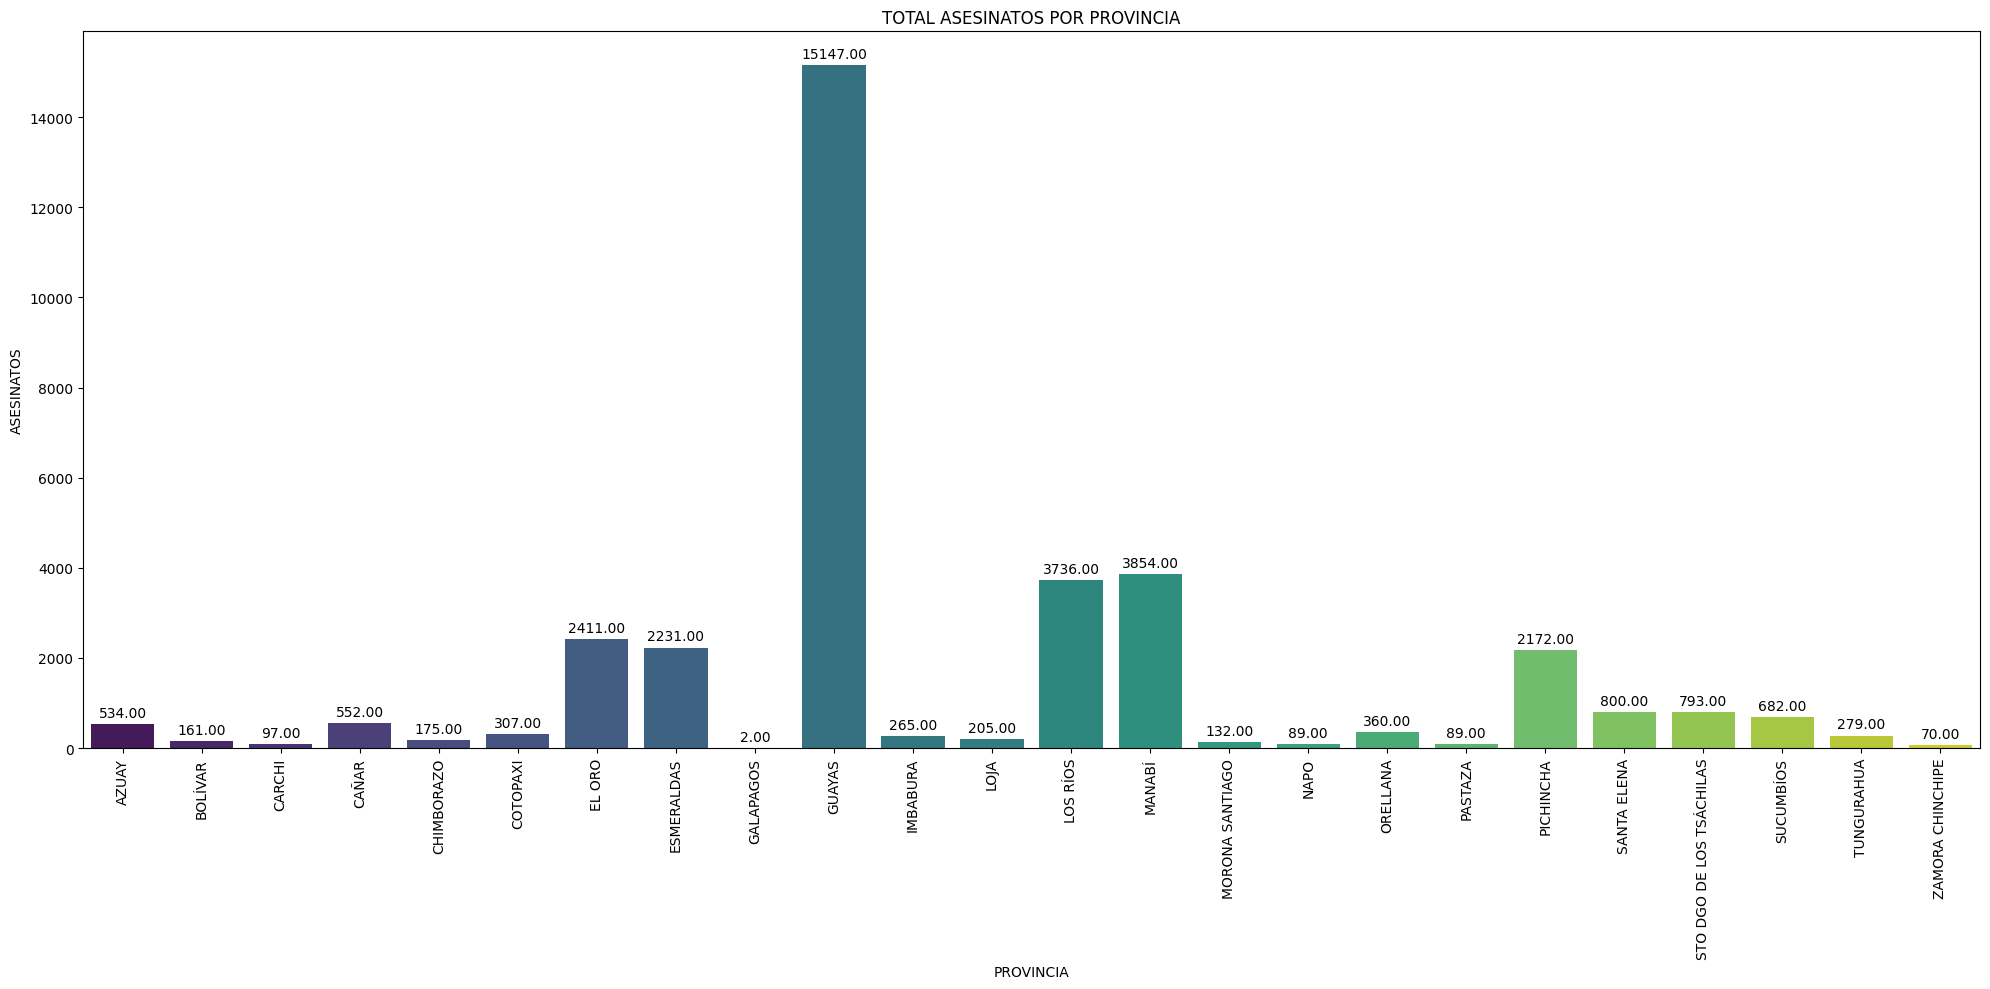

C:\Users\Megam\AppData\Local\Temp\ipykernel_21540\360568013.py:36: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



,arma,muertes
2,ARMA DE FUEGO,27178
0,ARMA BLANCA,4889
4,OTROS,1355
1,ARMA CONTUNDENTE,1066
3,CONSTRICTORA,616
5,SUSTANCIAS,39


EDAD DE LAS VICTIMAS 
Menor de 0-17 años, Joven de 18-30 años, Adulto Joven de 31-45 años, Adulto de  46-60 años y Mayor de 61-120 años


,grupo_edad,cantidad
0,Joven,15732
1,Adulto joven,11873
2,Adulto,3742
3,Menor,1712
4,Mayor,1317


In [66]:
from IPython.display import display
import pandas
import plotly.express as px
import matplotlib.pyplot as plt

pandas.set_option('display.max_rows', None)

def DrawMuertesBars(df:pandas.DataFrame):
    df = df.groupby('provincia')['provincia'].count().reset_index(name="total")
    df["total"] = df["total"].astype(float)
    
    plt.figure(figsize=(20, 10))
    ax = seaborn.barplot(
        data=df,
        x="provincia",
        y="total",
        hue='provincia',
        palette="viridis",
        legend=False,
    )
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3)
    ax.ticklabel_format(style="plain", axis="y")
    plt.title("Total asesinatos por provincia".upper())
    plt.xlabel("Provincia".upper())
    plt.ylabel("Asesinatos".upper())
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()    

# Dibuja cada uno de los puntos gps de las personas asesinadas
def DrawMuertesMap(df:pandas.DataFrame):
    dfPlot = df.dropna(subset=["coordenada_x", "coordenada_y"]).copy()
    dfPlot["coordenada_x"] = dfPlot["coordenada_x"].astype(float)
    dfPlot["coordenada_y"] = dfPlot["coordenada_y"].astype(float)
    fig = px.scatter_mapbox(
        dfPlot,
        lat="coordenada_y",
        lon="coordenada_x",
        color="provincia",       # agrupa por categoría
        hover_name="provincia",    # aparece al pasar el mouse
        zoom=5.5,
        center={"lat": -1.5, "lon": -78},
        mapbox_style="carto-positron",
        opacity=0.7,
        size_max=10,
        title= "Ubicaciones de asesinatos"
    )
    fig.show()
    
# Muertes por provincia
muertes_por_provincia = dfMain.groupby('provincia')['tipo_muerte'].count().reset_index(name='muertes').sort_values(by='muertes', ascending=False)
display (muertes_por_provincia)


# Muertes detallando el cantón, zona y subcircuito de la provincia de Guayas  
muertes_por_provincia_detallado = dfMain[dfMain['provincia']=='GUAYAS'].groupby('canton')['tipo_muerte'].count().reset_index(name='muertes').sort_values(by=['muertes','canton'], ascending=[False,True])
display (muertes_por_provincia_detallado.head(50))
DrawMuertesBars(dfMain)
DrawMuertesMap(dfMain)

# Muertes por arma
muertes_por_arma = dfMain.groupby('arma')['tipo_muerte'].count().reset_index(name='muertes').sort_values(by='muertes', ascending=False)
display (muertes_por_arma)

# Número de victimas por grupo de edad Menor de 0-17 años, Joven de 18-30 años, Adulto Joven de 31-45 años, Adulto de  46-60 años y Mayor de 61-120 años
perfil_edad = dfMain['grupo_edad'].value_counts().reset_index(name='cantidad')
print("EDAD DE LAS VICTIMAS ")
print ("Menor de 0-17 años, Joven de 18-30 años, Adulto Joven de 31-45 años, Adulto de  46-60 años y Mayor de 61-120 años")
display (perfil_edad)




# 5️⃣ Análisis y Presentación de Insights Preliminares
¿Cuál es la provincia con más muertes violentas?    
Según el procesamiento de los datos la provincia con más muertes violentas es Guayas. 

Teniendo a Guayas como la provincia con más número de muertes violentas nos planteamos la siguiente pregunta.

¿Cuál es el cantón de la provincia de Guayas con mas muertes violentas?  
Analizando los resultados podemos observar que el cantón Guayaquil. 

¿Cuál es el mayor grupo de edad de las victimas a nivel país?     
El grupo de edad que mayormente es victima de muerte es el grupo Joven de 18 a 30 años. 

# 6️⃣ Conclusiones del Proceso y análisis de datos
 1. En la limpieza y exploración inicial pudimos observar que la información contenía muchos errores por ser tomada de datos reales al parecer de forma manual. A continuación se detalla los errores:
    - Tipeo en las columnas de provincia, cantón y subcircuito, los mismos que se arreglaron reemplazando correctamente los datos.
    - Al realizar la exploracióm observamos que las columnas no tenían valores nulos, mas sin embargo al analizar exahustivamente se visualizó que ciertas columnas tenían valores no acordes a su naturaleza, por ejemplo, edad contenía valores que decía SIN_VALOR este tipo de anomalía correspondía al 2% del total de los datos de esa columna, por tal motivo se tomo la decisión de reemplazar esos valores por Nulos (valores descartables), estos valores no se tomaron en cuenta al momento del análisis y por ser tan infimos comparados con el total de los datos no iba a modificar el resultado.
    - Se cambio los tipos de datos acorde a la semántica y análisis requerido obteniendo lo siguiente: Float64(2), Int64(1), datetime64[ns](1), string(29) 
    - Se convirtio a mayúsculas y se elimino los espacios en blanco al inicio y al final de los datos string.

2. La información se obtuvo de varias fuentes por tal motivo se tuvo que integrar en una sola.

3. Un paso de vital importancia para la obtención de resultados correctos es realizar una limpieza exhaustiva de los datos a pesar de aparentar que son datos correctos.

4. Según el procesamiento de los datos la provincia con más muertes violentas es Guayas. con 15147 muertes, lo que representa el 43.10% del total de muertes del país, seguida por las provincias de Manabí, Los Ríos, El Oro y Esmeraldas; que en conjunto suman 77.91% de muertes violentas, lo que podemos concluir que más de las 3/4 partes de muertes se encuentran focalizadas en estas provincias de la costa.

5. Analizando los resultados podemos observar que el cantón Guayaquil registra 9724 muertes violentas siendo el 64.20% a nivel provincia, observando que más de la mitad de muertes suceden en el cantón Guayaquil.

6. Organizamos la columna edad por grupos de la siguiente manera: 
Menor           0 - 17 años
Joven           18 - 30 años
Adulto Joven    31 - 45 años
Adulto          46 - 60 años
Mayor           61 - 120 años. Al examinar la salida obtenida podemos decir que las victimas a nivel país se encuentran entre 18 y 30 años de edad que corresponde al grupo joven, este resultado permite entender quiénes son las principales víctimas con el objetivo de diseñar acciones tales como: programas educativos y laborales en poblaciones vulnerables, intervención social en jóvenes con riesgo de vinculación a pandillas, etc.
 
7. Estos resultados ayudarán a identificar los puntos algidos de violencia, facilitando una mejor distribución de recursos policiales y priorización de patrullajes y operativos en la provincia de Guayas.

8. Este tipo de trabajos nos permiten afianzar los conocimientos adquiridos en clases, para las personas que no tenemos experiencia en el análisis de datos realmente es un reto cada ejercicio, pero lo gratificante es que vamos adquiriendo y afinando el conocimiento. 

